In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [3]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("../input/train.csv")
test_df    = pd.read_csv("../input/test.csv")

In [4]:
K_FOLD_NUM = 5

In [5]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X_train, Y_train):
    plt.figure()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes=np.linspace(.1, 1.0, 8)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, 
        train_sizes=train_sizes, cv=K_FOLD_NUM)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

In [6]:
# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print titanic_df.info()
print test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [8]:
titanic_df.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name','Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
# titanic_df['Survived'].value_counts()
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Pclass
# sns.barplot(x="Pclass", y="Survived", data=titanic_df)
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'], prefix='Class')
pclass_dummies_test  = pd.get_dummies(test_df['Pclass'], prefix='Class')

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [11]:
# titanic_df.info()

In [12]:
# Age
# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# fill NaN values in Age column with random values generated
titanic_df.loc[np.isnan(titanic_df["Age"]), "Age"] = rand_1
test_df.loc[np.isnan(test_df["Age"]), "Age"] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

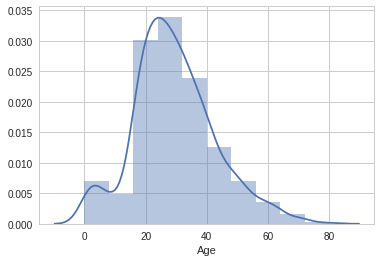

In [13]:
sns.distplot(titanic_df["Age"], bins=10);

In [14]:
# age_scaler = preprocessing.MinMaxScaler()
# ages = age_scaler.fit_transform(titanic_df[["Age"]])
# titanic_df[["Age"]] = ages
# print ages[:3]
# titanic_df["Age"] = ages
# titanic_df['Age'].describe()

# sns.countplot(x='Age', data=titanic_df)
# print titanic_df["Age"].describe()
# age_scaler = preprocessing.StandardScaler()
# titanic_df["Age"] = age_scaler.fit_transform(titanic_df["Age"])
# print age_scaler.mean_, age_scaler.scale_
# person_perc.ix[:3]

In [15]:
bins = [0, 16,100]
cats = pd.cut(titanic_df["Age"], bins)
cats.value_counts()

(16, 100]    785
(0, 16]       99
Name: Age, dtype: int64

In [16]:
# titanic_df['age_cat'] = cats
# sns.barplot(x="age_cat", y="Survived", hue='Sex', data=titanic_df);
# sns.barplot(x="Sex", y="Survived", data=titanic_df);
# titanic_df.drop(['age_cat'], axis=1, inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Class_1     891 non-null uint8
Class_2     891 non-null uint8
Class_3     891 non-null uint8
dtypes: float64(1), int64(4), object(2), uint8(3)
memory usage: 51.4+ KB


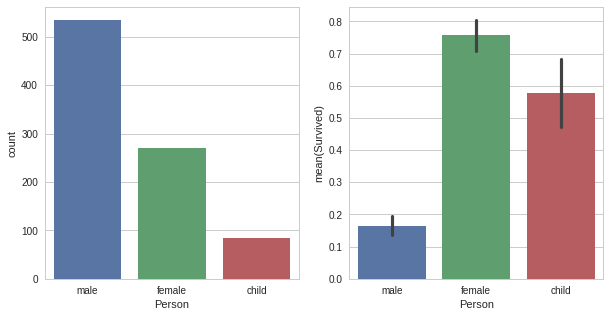

In [17]:
# Sex
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Person', data=titanic_df, ax=axis1)
sns.barplot(x='Person', y='Survived', data=titanic_df, ax=axis2, order=['male','female','child'])

person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

In [18]:
# drop the colunms
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

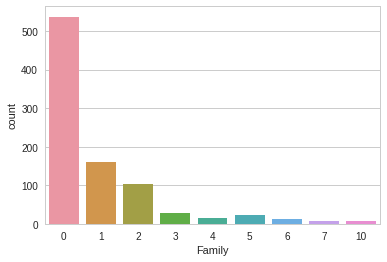

In [19]:
# Family
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
sns.countplot(x='Family', data=titanic_df)

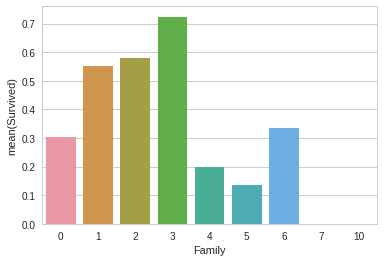

In [20]:
# titanic_df[['Family', 'Survived']].groupby('Family')
data = titanic_df[["Family", "Survived"]].groupby(['Family'], as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=data)

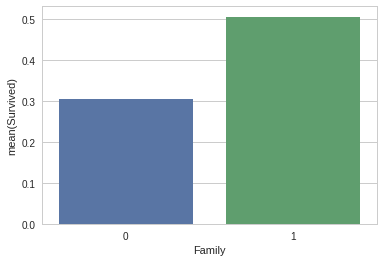

In [21]:
titanic_df.loc[titanic_df['Family'] > 0, 'Family'] = 1
titanic_df.loc[titanic_df['Family'] == 0, 'Family'] = 0
data = titanic_df[["Family", "Survived"]].groupby(['Family'], as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=data)

In [22]:
# drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

In [23]:
# Fare
# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)
# # convert from float to int
# titanic_df['Fare'] = titanic_df['Fare'].astype(int)
# test_df['Fare']    = test_df['Fare'].astype(int)

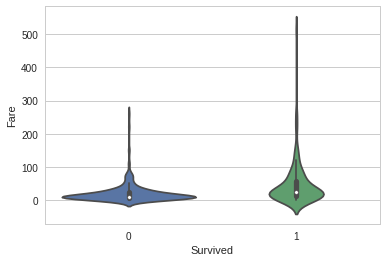

In [24]:
sns.violinplot(x="Survived", y="Fare", data=titanic_df)
# sns.boxplot(x="Survived", y="Fare", data=titanic_df)

# bins = [0, 16,100]
# cats = pd.cut(titanic_df["Age"], bins)
# cats.value_counts()

# sns.distplot(titanic_df['Fare'], bins=50);

In [25]:
# fare_scaler = preprocessing.MinMaxScaler()
# fare = age_scaler.fit_transform(titanic_df[["Fare"]])
# sns.distplot(fare[:,0], bins=50);
# titanic_df[["Age"]] = ages

group = titanic_df[["Fare", "Survived"]].groupby(['Survived'], as_index=False)
print group.mean()
print group.std()

   Survived       Fare
0         0  22.117887
1         1  48.395408
   Survived       Fare
0       0.0  31.388207
1       1.0  66.596998


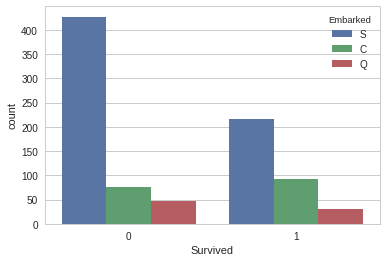

In [26]:
# titanic_df[["Fare"]] = fare
# titanic_df['Pclass'].corr(titanic_df['Fare'])
# titanic_df['Embarked'].value_counts()
sns.countplot(x='Survived', hue='Embarked', data=titanic_df)

In [27]:
titanic_df["Embarked"].fillna('S', inplace=True)

In [28]:
dum_in = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')
dum_out = pd.get_dummies(test_df['Embarked'], prefix='Embarked')

titanic_df.drop(['Embarked'],axis=1,inplace=True)
test_df.drop(['Embarked'],axis=1,inplace=True)

titanic_df = titanic_df.join(dum_in)
test_df = test_df.join(dum_out)

In [29]:
titanic_df.head()
# test_df.head()

,Survived,Age,Fare,Class_1,Class_2,Class_3,Child,Female,Male,Family,Embarked_C,Embarked_Q,Embarked_S
0,0,22,7.2500,0,0,1,0,0,1,1,0,0,1
1,1,38,71.2833,1,0,0,0,1,0,1,1,0,0
2,1,26,7.9250,0,0,1,0,1,0,0,0,0,1
3,1,35,53.1000,1,0,0,0,1,0,1,0,0,1
4,0,35,8.0500,0,0,1,0,0,1,0,0,0,1


In [30]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

# define training and testing sets
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()
k_fold = StratifiedKFold(n_splits=5)

In [31]:
random_forest = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1)
random_forest.fit(X_train, Y_train)
random_forest.oob_score_
# random_forest.score(X_train, Y_train)

0.80471380471380471

In [32]:
d = {'Features': X_train.columns,  'Factor': random_forest.feature_importances_}
DataFrame(d).sort_values(by='Factor', ascending=False)

,Factor,Features
1,0.275795,Fare
0,0.265055,Age
7,0.162293,Male
6,0.114682,Female
4,0.060753,Class_3
2,0.029913,Class_1
8,0.023599,Family
3,0.020427,Class_2
11,0.013682,Embarked_S
9,0.013257,Embarked_C


In [33]:
def calcErrorIn(n_estimators, max_features):
    print 'calcErrorIn parameter:', n_estimators, max_features
    random_forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, n_jobs=-1)
    random_forest.fit(X_train, Y_train)
    print random_forest.score(X_train, Y_train)

In [75]:
def calcOOBScore(estimator_class, n_estimators, max_features, max_depth):
    print 'calcOOBScore parameter:', estimator_class.__name__, n_estimators, max_features, max_depth
    estimator = estimator_class(n_estimators=n_estimators, max_features=max_features, 
    max_depth=max_depth, oob_score=True, bootstrap=True, n_jobs=-1)
    estimator.fit(X_train, Y_train)
    print estimator.oob_score_
    return estimator

In [65]:
def runKTimes(kTimes, estimator_class, n_estimators, max_features, max_depth):
    scores = []
    for _ in xrange(kTimes):
        estimator = calcOOBScore(estimator_class, n_estimators, max_features, max_depth)
        scores.append(estimator.oob_score_)
    scores = np.array(scores)
    print scores.mean(), scores.std(), scores

In [74]:
# cv_score.mean()
# n_estimators = np.arange(700, 1001, 100)
# max_features = [3, 4, 5]
# for a in n_estimators:
#     for b in max_features:
#         calcOOBScore(RandomForestClassifier, a, b, 5)

In [57]:
rf = RandomForestClassifier(n_estimators=1000, max_features=3, max_depth=5)
scores = cross_val_score(rf, X_train, Y_train, cv=K_FOLD_NUM, n_jobs=-1)
print scores.mean(), scores
# calcErrorIn(8000, 5)

0.818201374785 [ 0.81005587  0.82122905  0.83146067  0.79775281  0.83050847]


In [64]:
n_estimators = np.arange(2000, 4001, 1000)
max_features = [5]
for a in n_estimators:
    for b in max_features:
        calcOOBScore(ExtraTreesClassifier, a, b, 5)

calcOOBScore parameter: ExtraTreesClassifier 2000 5 5
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 3000 5 5
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 4000 5 5
0.82379349046


In [59]:
rf = ExtraTreesClassifier(n_estimators=2000, max_features=5, max_depth=5)
scores = cross_val_score(rf, X_train, Y_train, cv=K_FOLD_NUM, n_jobs=-1)
print scores.mean(), scores

0.818195168642 [ 0.82122905  0.82122905  0.82022472  0.79213483  0.83615819]


In [73]:
runKTimes(10, ExtraTreesClassifier, 3000, 5, 4)

calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.82379349046
calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.822671156004
calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.82379349046
0.823681257015 0.0003367003367 [ 0.82379349  0.82379349  0.82379349  0.82379349  0.82379349  0.82379349
  0.82379349  0.82379349  0.82267116  0.82379349]


In [55]:
rf = RandomForestClassifier()
n_estimators = np.arange(100, 300, 50)
max_features = ['auto', 'sqrt', 'log2']
param_grid=dict(n_estimators=n_estimators, max_features=max_features)
gs_cv = GridSearchCV(estimator=rf, cv=K_FOLD_NUM, param_grid=param_grid, n_jobs=-1)
gs_cv.fit(X_train, Y_train)
gs_cv.best_score_

0.80246913580246915

In [54]:
np.arange(5, 100, 20)

array([ 5, 25, 45, 65, 85])

In [65]:
gs_cv.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [19]:
from sklearn.linear_model import LogisticRegressionCV
constants = list(np.power(2.0, np.arange(1, 7)))
searchCV = LogisticRegressionCV(
        Cs= constants
        ,penalty='l2'
        ,cv=k_fold
        ,max_iter=100
        ,fit_intercept=True
        ,solver='liblinear'
    )
searchCV.fit(X_train, Y_train)
# searchCV.scores_

LogisticRegressionCV(Cs=[2.0, 4.0, 8.0, 16.0, 32.0, 64.0], class_weight=None,
           cv=KFold(n_splits=4, random_state=None, shuffle=False),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

In [20]:
scores_mean = np.mean(searchCV.scores_[1], axis=0)
scores_std = np.std(searchCV.scores_[1], axis=0)
print scores_mean
print scores_std
# plt.bar(constants, scores_mean, yerr=scores_std)

[ 0.79013655  0.7923787   0.7946259   0.79350988  0.7923888   0.79126773]
[ 0.01642893  0.0109585   0.00943646  0.01278486  0.01438629  0.01839715]


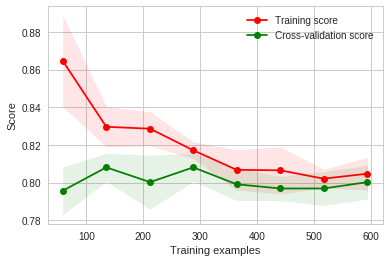

In [18]:
estimator = LogisticRegression()
estimator.set_params(C=8)
plot_learning_curve(estimator, X_train, Y_train)

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
n_estimators = np.arange(1, 10)
learn_rates = np.linspace(.1, 1.0, 5)
print n_estimators
print learn_rates

[1 2 3 4 5 6 7 8 9]
[ 0.1    0.325  0.55   0.775  1.   ]


In [51]:
base_estimator = DecisionTreeClassifier(max_depth=2)
bdt = AdaBoostClassifier(base_estimator, algorithm="SAMME.R")
gs_cv = GridSearchCV(estimator=bdt,
    param_grid=dict(n_estimators=n_estimators, learning_rate=learn_rates))
gs_cv.fit(X_train, Y_train)
gs_cv.best_score_

0.81369248035914699

In [52]:
best_estimator = gs_cv.best_estimator_
best_estimator.get_params()
# gs_cv.cv_results_

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 2,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_split': 1e-07,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'learning_rate': 0.55000000000000004,
 'n_estimators': 6,
 'random_state': None}

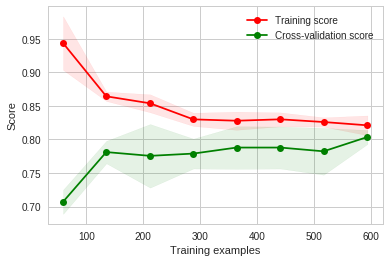

In [25]:
base_estimator = DecisionTreeClassifier(max_depth=2)
# base_estimator = LogisticRegression(C=8)
bdt = AdaBoostClassifier(base_estimator, algorithm="SAMME.R",n_estimators=6, learning_rate= 0.55)
plot_learning_curve(bdt, X_train, Y_train)

In [29]:
cross_val_score(bdt, X_train, Y_train, cv=k_fold, n_jobs=-1)

array([ 0.78923767,  0.83408072,  0.79372197,  0.81981982])

In [52]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = np.arange(5, 50, 10)
max_features = ['auto', 'sqrt', 'log2']
print n_estimators

[ 5 15 25 35 45]


In [55]:
estimator = RandomForestClassifier()
gs_cv = GridSearchCV(estimator=estimator, cv=sk_fold,
    param_grid=dict(n_estimators=n_estimators, max_features=max_features))
gs_cv.fit(X_train, Y_train)
gs_cv.best_score_

0.80246913580246915

In [39]:
best_estimator = gs_cv.best_estimator_
best_estimator.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 15,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
# gs_cv.cv_results_
gs_cv

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': array([ 5, 15, 25, 35, 45])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [67]:
rf = RandomForestClassifier(n_estimators=45)
# cross_val_score(rf, X_train, Y_train, cv=k_fold, n_jobs=-1)

In [68]:
rf.fit(X_train, Y_train)
d = {'Features': titanic_df.columns.delete(0) ,  'Factor': rf.feature_importances_}
DataFrame(d)

,Factor,Features
0,0.262600,Age
1,0.296081,Fare
2,0.027247,Class_1
3,0.020907,Class_2
4,0.062232,Class_3
5,0.010104,Child
6,0.109914,Female
7,0.189582,Male
8,0.021332,Family


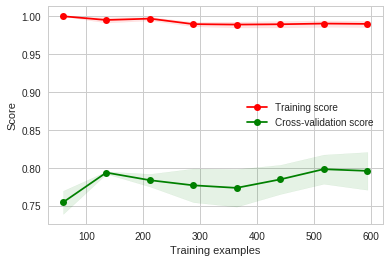

In [59]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
plot_learning_curve(rf, X_train, Y_train)

In [79]:
# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# coeff_df = DataFrame(titanic_df.columns.delete(0))
# coeff_df.columns = ['Features']
# coeff_df["Coefficient"] = pd.Series(logreg.coef_[0])
# coeff_df.sort_values(by='Coefficient', ascending=False)
et = calcOOBScore(ExtraTreesClassifier, 3000, 5, 4)
print et

calcOOBScore parameter: ExtraTreesClassifier 3000 5 4
0.822671156004
ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=4, max_features=5, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3000, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)


In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Age           418 non-null int64
Fare          418 non-null float64
Class_1       418 non-null uint8
Class_2       418 non-null uint8
Class_3       418 non-null uint8
Child         418 non-null uint8
Female        418 non-null uint8
Male          418 non-null uint8
Family        418 non-null int64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(1), int64(2), uint8(9)
memory usage: 13.5 KB


In [78]:
# logreg = LogisticRegression(C=4)
# logreg.fit(X_train, Y_train)
Y_pred = et.predict(X_test)
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived": Y_pred})
submission.to_csv('titanic.csv', index=False)

In [29]:
points = np.arange(3)
print points
xs, ys = np.meshgrid(points, points)
print ys

[0 1 2]
[[0 0 0]
 [1 1 1]
 [2 2 2]]


In [85]:
X_test.head()

,Age,Fare,Class_1,Class_2,Class_3,Child,Female,Male,Family,Embarked_C,Embarked_Q,Embarked_S
0,34,7.8292,0,0,1,0,0,1,0,0,1,0
1,47,7.0000,0,0,1,0,1,0,1,0,0,1
2,62,9.6875,0,1,0,0,0,1,0,0,1,0
3,27,8.6625,0,0,1,0,0,1,0,0,0,1
4,22,12.2875,0,0,1,0,1,0,2,0,0,1
